Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1173 non-null   int64  
 1   title            1173 non-null   object 
 2   publishedAt      1173 non-null   object 
 3   viewCount        1173 non-null   int64  
 4   likeCount        1173 non-null   int64  
 5   commentCount     1173 non-null   int64  
 6   Month            1173 non-null   object 
 7   engagement_rate  1173 non-null   float64
 8   date             23 non-null     object 
 9   peliculas        23 non-null     float64
 10  isPartial        23 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 100.9+ KB
None

Estadísticas descriptivas:
       Unnamed: 0     viewCount     likeCount  commentCount  engagement_rate  \
count  1173.00000  1.173000e+03   1173.000000   1173.000000      1173.000000   
mean    586.0

C:\Users\itzel\AppData\Local\Temp\ipykernel_22584\4057703515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_engagement, x="engagement_rate", y="title", palette="viridis")
C:\Users\itzel\AppData\Local\Temp\ipykernel_22584\4057703515.py:21: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\itzel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


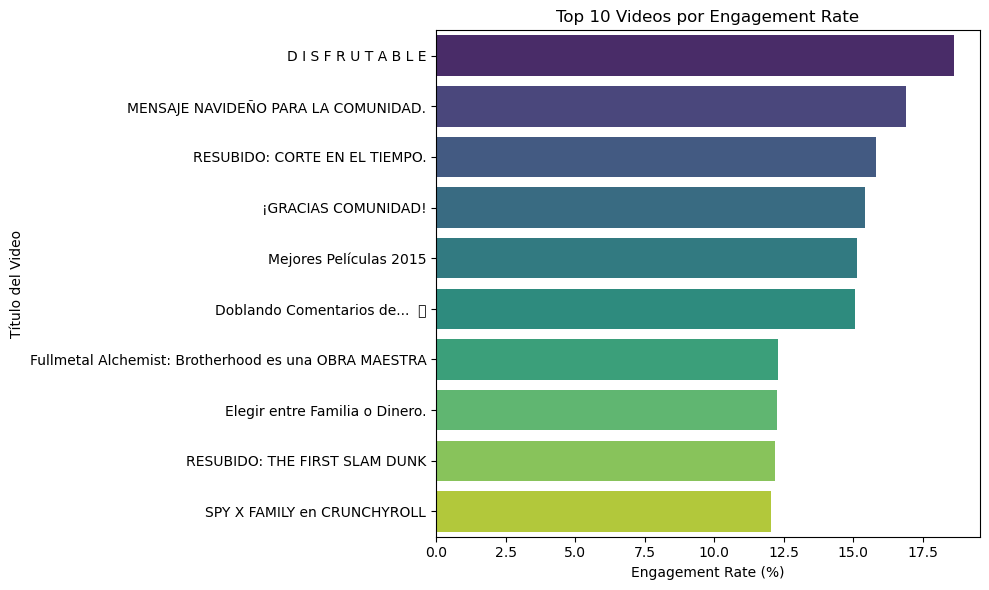

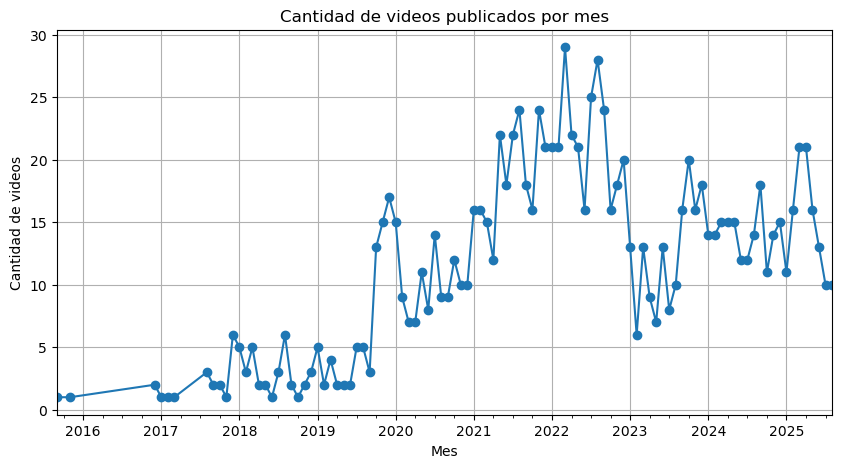

C:\Users\itzel\AppData\Local\Temp\ipykernel_22584\4057703515.py:44: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_22584\4057703515.py:44: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_22584\4057703515.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\itzel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\itzel\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


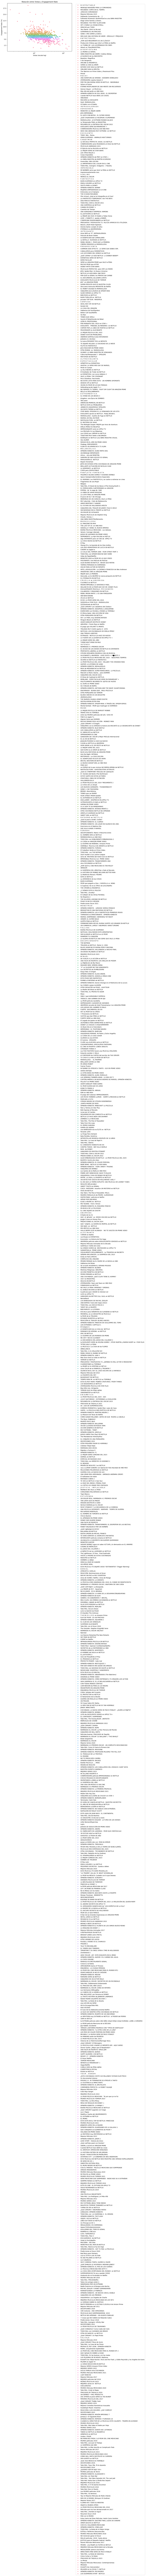

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar dataset limpio
df = pd.read_csv("../data/processed/final_dataset.csv")

# 2. Información general
print("Información del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# 3. Top 10 videos por engagement rate
top_engagement = df.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_engagement, x="engagement_rate", y="title", palette="viridis")
plt.title("Top 10 Videos por Engagement Rate")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Título del Video")
plt.tight_layout()
plt.show()

# 4. Tendencia de publicaciones en el tiempo
df["publishedAt"] = pd.to_datetime(df["publishedAt"])
videos_por_mes = df.groupby(df["publishedAt"].dt.to_period("M")).size()

plt.figure(figsize=(10,5))
videos_por_mes.plot(kind="line", marker="o")
plt.title("Cantidad de videos publicados por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de videos")
plt.grid(True)
plt.show()

# 5. Relación entre vistas y engagement rate
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="viewCount", y="engagement_rate", hue="title", alpha=0.7)
plt.title("Relación entre Vistas y Engagement Rate")
plt.xscale("log")  # escala log para mejor visualización
plt.xlabel("Vistas (escala log)")
plt.ylabel("Engagement Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. Guardar dataset listo para dashboard
#df.to_csv("../dashboards/youtube_dashboard_th.csv", index=False)
#print("✅ Dataset para dashboard exportado en data/processed/youtube_dashboard_th.csv")
